In [5]:
import pandas as pd
import numpy as np
import country_converter as coco
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import nltk

%matplotlib inline

# Component: Raw Data Source

## Step 1. Select
From a variety of Data sources, we had to decide which raw data to use that can fit our interest and choose one data set to explore about the content. Finally we chose the salary data for 2023, we can study a more recent trend about the labor market which helps us to understand our strength.

In [6]:
df = pd.read_csv('../data/ds_salaries.csv')

## Step 2. Identify
Identify what types of data that we are using and its applicability. In our data, we have numbers, integers, decimals and texts which are arranged by different columns to assist us to have a more clear view of the data that we can use to answer the questions we originally defined.

- **Identitfy what types of data we are using**
- **Give a more clear view by filling more complete information**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [8]:
df['experience_level'].value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

In [9]:
employment_type = 'employment_type'
df[employment_type] = df[employment_type].replace('FT','Full-Time')
df[employment_type] = df[employment_type].replace('CT','Contract')
df[employment_type] = df[employment_type].replace('PT','Part-Time')
df[employment_type] = df[employment_type].replace('FL','Freelance')
df[employment_type].value_counts()

employment_type
Full-Time    3718
Part-Time      17
Contract       10
Freelance      10
Name: count, dtype: int64

In [10]:
experience_level = 'experience_level'
df[experience_level] = df[experience_level].replace('EN','Entry-level/Junior')
df[experience_level] = df[experience_level].replace('MI','Mid-level/Intermediate')
df[experience_level] = df[experience_level].replace('SE','Senior-level/Expert')
df[experience_level] = df[experience_level].replace('EX','Executive-level/Director')
df[experience_level].value_counts()

experience_level
Senior-level/Expert         2516
Mid-level/Intermediate       805
Entry-level/Junior           320
Executive-level/Director     114
Name: count, dtype: int64

## Step 3. Check 
Considering how to keep the data and its functions to use. We considered putting data in github to store our data in a structured way and easy to reach, to import and understand. 
- **We put the data on github for single source of truth and easy to access.**
- **Check the data of row is complete, and no null value.**

## Step 4. Access
Ensure the access of data and the sources suit the problem we defined at the first beginning. Here, when we were processing data, we were checking if the model can be run smoothly.
- **We can access the data smoothly and the data is in a good format to use.**

In [11]:
print(df.shape)
df.head()

(3755, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-level/Expert,Full-Time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,Mid-level/Intermediate,Contract,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,Mid-level/Intermediate,Contract,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,Senior-level/Expert,Full-Time,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,Senior-level/Expert,Full-Time,Data Scientist,120000,USD,120000,CA,100,CA,M


In [12]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## Step 5. Extract
Pick up the relevant data to use and ensure the data can be accessed without problem.
* **We select the necessary columns to use and drop the columns that are not useful for our analysis.**

In [13]:
df.drop(df[['salary','salary_currency']], axis = 1, inplace = True)
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-level/Expert,Full-Time,Principal Data Scientist,85847,ES,100,ES,L
1,2023,Mid-level/Intermediate,Contract,ML Engineer,30000,US,100,US,S
2,2023,Mid-level/Intermediate,Contract,ML Engineer,25500,US,100,US,S
3,2023,Senior-level/Expert,Full-Time,Data Scientist,175000,CA,100,CA,M
4,2023,Senior-level/Expert,Full-Time,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,Senior-level/Expert,Full-Time,Data Scientist,412000,US,100,US,L
3751,2021,Mid-level/Intermediate,Full-Time,Principal Data Scientist,151000,US,100,US,L
3752,2020,Entry-level/Junior,Full-Time,Data Scientist,105000,US,100,US,S
3753,2020,Entry-level/Junior,Contract,Business Data Analyst,100000,US,100,US,L


# Use Case 1 - Ranking of Salary Levels by Country

### Component: Explorative Data Analysis

### Step 6. Select
After extracting the most important data, we have already selected those that can be analyzed and to dive into different characteristics about the data, or our employment data to build preparation strategies or to make sure the validity of the result.
- **We selected the use case that we are interested in for use case 1.**
- **We output the necessary data, and saving to the github.**

In [14]:
selected_columns = ['employee_residence', 'company_location', 'salary_in_usd']
RankingSalary = df[selected_columns]
RankingSalary

,employee_residence,company_location,salary_in_usd
0,ES,ES,85847
1,US,US,30000
2,US,US,25500
3,CA,CA,175000
4,CA,CA,120000
...,...,...,...
3750,US,US,412000
3751,US,US,151000
3752,US,US,105000
3753,US,US,100000


### Step 7. Identity
To identify which kind of data that we can use also helps ourselves to prepare the data to be analyzed. After we choose the columns and data characteristics which fit to use for our problem to be solved or questions to be answered, we can prepare the analysis better than directly diving into it.

- **Access the data from Data Management, which is from github.**
- **We identify the country code by country_converter libaray.**
- **Printout the average salary by company location.**


In [15]:
import json

# 打開JSON文件並指定字符編碼為'utf-8'
with open('../data/iso03_country.json', 'r', encoding='utf-8') as json_file:
    iso03_to_country = json.load(json_file)

iso03_to_country

{'ABW': 'Aruba',
 'AFG': 'Afghanistan',
 'AGO': 'Angola',
 'AIA': 'Anguilla',
 'ALA': 'Åland Islands',
 'ALB': 'Albania',
 'AND': 'Andorra',
 'ARE': 'United Arab Emirates',
 'ARG': 'Argentina',
 'ARM': 'Armenia',
 'ASM': 'American Samoa',
 'ATA': 'Antarctica',
 'ATF': 'French Southern Territories',
 'ATG': 'Antigua and Barbuda',
 'AUS': 'Australia',
 'AUT': 'Austria',
 'AZE': 'Azerbaijan',
 'BDI': 'Burundi',
 'BEL': 'Belgium',
 'BEN': 'Benin',
 'BES': 'Bonaire, Sint Eustatius and Saba',
 'BFA': 'Burkina Faso',
 'BGD': 'Bangladesh',
 'BGR': 'Bulgaria',
 'BHR': 'Bahrain',
 'BHS': 'Bahamas',
 'BIH': 'Bosnia and Herzegovina',
 'BLM': 'Saint Barthélemy',
 'BLR': 'Belarus',
 'BLZ': 'Belize',
 'BMU': 'Bermuda',
 'BOL': 'Bolivia (Plurinational State of)',
 'BRA': 'Brazil',
 'BRB': 'Barbados',
 'BRN': 'Brunei Darussalam',
 'BTN': 'Bhutan',
 'BVT': 'Bouvet Island',
 'BWA': 'Botswana',
 'CAF': 'Central African Republic',
 'CAN': 'Canada',
 'CCK': 'Cocos (Keeling) Islands',
 'CHE': 'Switzerland',


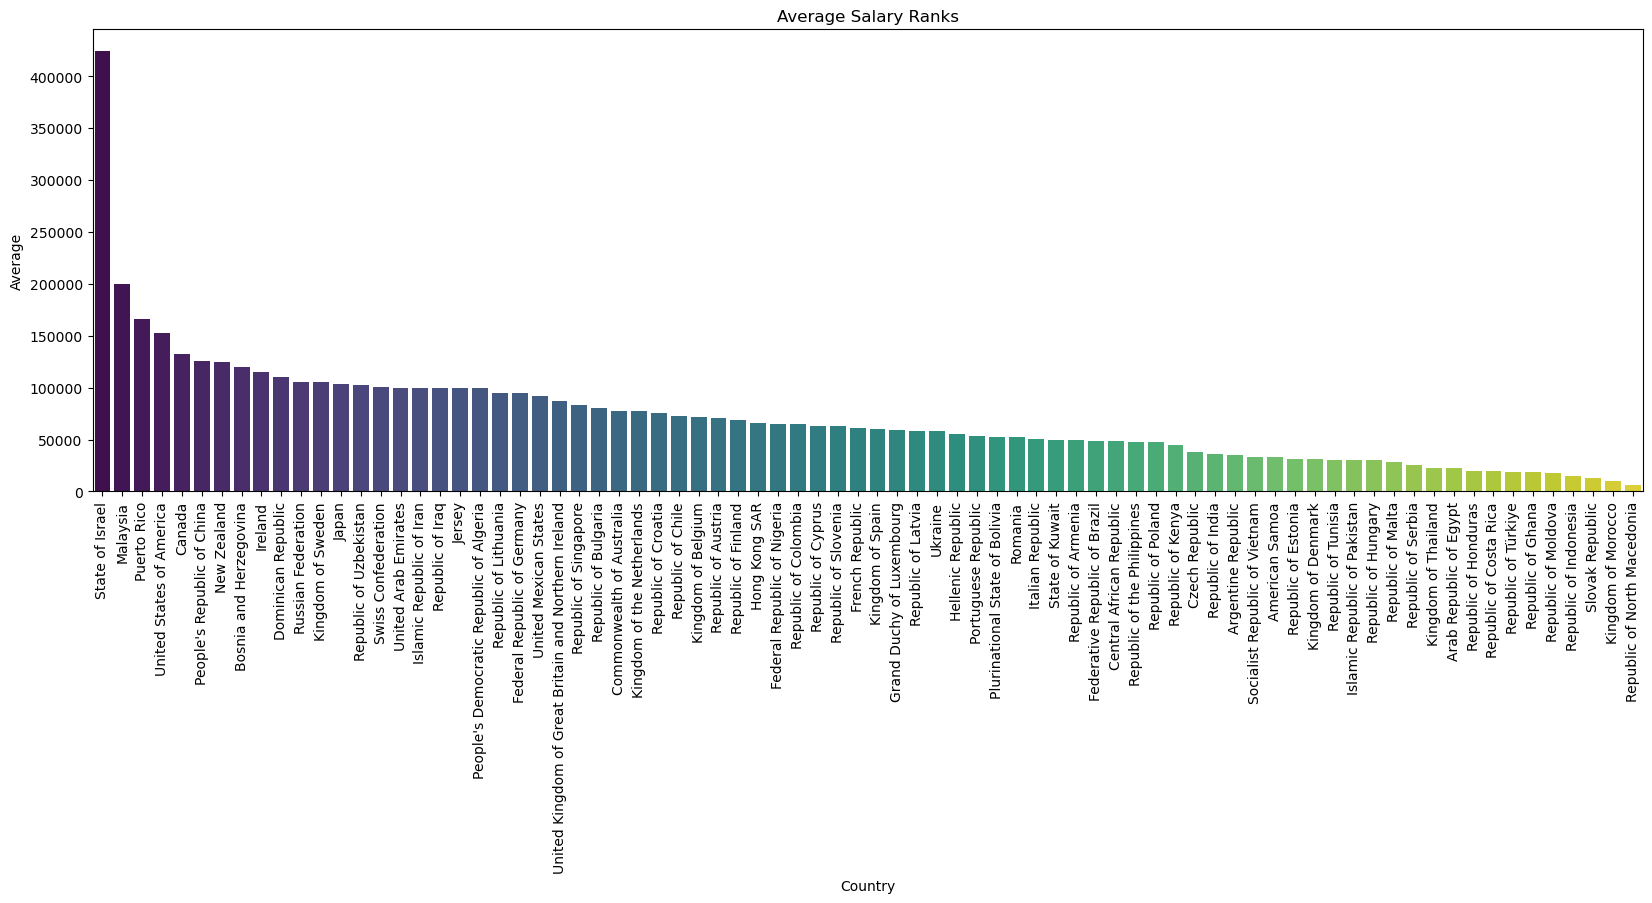

In [16]:
country = coco.convert(names = df['employee_residence'], to = "official")

RankingSalary['employee_residence'] = country
RankingSalary['company_location'] = country

salary = df['salary_in_usd']
RankingSalary['salary_in_usd'] = salary

#counts = uc1['employee_residence'].value_counts() 

# 使用 groupby 和 mean 計算各國的平均薪資
average_salary_by_country = RankingSalary.groupby('company_location')['salary_in_usd'].mean()

# 將結果轉換為數據框
average_salary_df = pd.DataFrame(average_salary_by_country).reset_index()



# Sort the DataFrame by 'salary_in_usd' in descending order
average_salary_df_sorted = average_salary_df.sort_values(by='salary_in_usd', ascending=False)

# Create a bar plot using seaborn
plt.figure(figsize=(20, 6))  # Adjust the figure size if needed
sns.barplot(x=average_salary_df_sorted['company_location'], y=average_salary_df_sorted['salary_in_usd'], palette='viridis')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.title('Average Salary Ranks')
plt.xlabel('Country')
plt.ylabel('Average') #Count
plt.show()


### Step 8. Check 
When arranging the data, the requirement should be checked. 

**Requirement**
1. No null value. 
2. Data can be used. 

In [17]:
RankingSalary.isnull()

,employee_residence,company_location,salary_in_usd
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
3750,False,False,False
3751,False,False,False
3752,False,False,False
3753,False,False,False


# Use Case 2 - Ranking of Salary Levels by Position

### Step 6. Select
After extracting the most important data, we have already selected those that can be analyzed and to dive into different characteristics about the data, or our employment data to build preparation strategies or to make sure the validity of the result.
- **We selected the use case that we are interested in for use case 2.**
- **We output the necessary data, and saving to the github.**

In [18]:
exp_job = df.groupby(['experience_level','job_title']).size()
exp_type = df.groupby(['experience_level','employment_type']).size()

### Step 7. Identify
To identify which kind of data that we can use also helps ourselves to prepare the data to be analyzed. After we choose the columns and data characteristics which fit to use for our problem to be solved or questions to be answered, we can prepare the analysis better than directly diving into it.

- **Access the data from Data Management, which is from github.**
- **We identify the Job Positions by the 4 different levels in the data.**
- **Printout the average salary by Job Positions.**

In [19]:
entry_top5 = exp_job['Entry-level/Junior'].sort_values(ascending = False)[:5]
executive_top5 = exp_job['Executive-level/Director'].sort_values(ascending = False)[:5]
mid_top5 = exp_job['Mid-level/Intermediate'].sort_values(ascending = False)[:5]
senior_top5 = exp_job['Senior-level/Expert'].sort_values(ascending = False)[:5]

# exp_type = df.groupby(['experience_level','employment_type']).size()

fig = go.Figure(data=[
    go.Bar(name = 'Entry-level/Junior', x = entry_top5.index, 
           y=entry_top5.values, text = entry_top5.values),
    go.Bar(name = 'Executive-level/Director', x = executive_top5.index,
           y = executive_top5.values, text = executive_top5.values),
    go.Bar(name = 'Mid-level/Intermediate', x = mid_top5.index,
           y = mid_top5.values, text = mid_top5.values ),
    go.Bar(name = 'Senior-level/Expert', x = senior_top5.index,
           y = senior_top5.values, text = senior_top5.values)])

fig.update_layout(xaxis_tickangle = -45, title = 'Experiece Level with top 5 job designations')
fig.show()

### Step 8. 
When arranging the data, the requirement should be checked. 

**Requirement**
1. No null value. 
2. Data can be used. 

In [20]:
entry_top5.isnull()
executive_top5.isnull()
mid_top5.isnull()
senior_top5.isnull()

job_title
Data Engineer                False
Data Scientist               False
Data Analyst                 False
Machine Learning Engineer    False
Data Architect               False
dtype: bool

In [21]:
entry_top5
executive_top5
mid_top5
senior_top5

job_title
Data Engineer                718
Data Scientist               608
Data Analyst                 380
Machine Learning Engineer    209
Data Architect                92
dtype: int64

# Use Case 3 - Ratio of Experience Levels in Positions

### Step 6. Select
After extracting the most important data, we have already selected those that can be analyzed and to dive into different characteristics about the data, or our employment data to build preparation strategies or to make sure the validity of the result.
- **We selected the use case that we are interested in for use case 3.**
- **We output the necessary data, and saving to the github.**

In [22]:
exp_type = df.groupby(['experience_level','employment_type']).size()

### Step 7. Identify
To identify which kind of data that we can use also helps ourselves to prepare the data to be analyzed. After we choose the columns and data characteristics which fit to use for our problem to be solved or questions to be answered, we can prepare the analysis better than directly diving into it.

- **Access the data from Data Management, which is from github.**
- **We identify the Job Positions by the 4 different levels in the data.**
- **Printout the average salary by Job Positions.**

In [23]:
fig = go.Figure(data = [
    go.Bar(name = 'Entry-level/Junior', x = exp_type['Entry-level/Junior'].index, 
           y = exp_type['Entry-level/Junior'].values, text = exp_type['Entry-level/Junior'].values),
    go.Bar(name = 'Executive-level/Director', x = exp_type['Executive-level/Director'].index, 
           y = exp_type['Executive-level/Director'].values, text = exp_type['Executive-level/Director'].values),
    go.Bar(name = 'Mid-level/Intermediate', x = exp_type['Mid-level/Intermediate'].index,
           y = exp_type['Mid-level/Intermediate'].values, text = exp_type['Mid-level/Intermediate'].values),
    go.Bar(name = 'Senior-level/Expert', x = exp_type['Senior-level/Expert'].index,
           y = exp_type['Senior-level/Expert'].values, text = exp_type['Senior-level/Expert'].values)])

fig.update_layout(xaxis_tickangle = -45, title = 'Experiece Level along with Employment Type')

fig.show()

### Step 8. 
When arranging the data, the requirement should be checked. 

**Requirement**
1. No null value. 
2. Data can be used. 

In [24]:
exp_type.isnull()

experience_level          employment_type
Entry-level/Junior        Contract           False
                          Freelance          False
                          Full-Time          False
                          Part-Time          False
Executive-level/Director  Contract           False
                          Full-Time          False
Mid-level/Intermediate    Contract           False
                          Freelance          False
                          Full-Time          False
                          Part-Time          False
Senior-level/Expert       Contract           False
                          Freelance          False
                          Full-Time          False
dtype: bool

# Use Case 4 - Top 15 Popular Professions

### Step 6. Select
After extracting the most important data, we have already selected those that can be analyzed and to dive into different characteristics about the data, or our employment data to build preparation strategies or to make sure the validity of the result.
- **We selected the use case that we are interested in for use case 4.**
- **We output the necessary data, and saving to the github.**

In [25]:
print('Different job designations altogether :', len(set(df['job_title'])))

Different job designations altogether : 93


### Step 7. Identify
To identify which kind of data that we can use also helps ourselves to prepare the data to be analyzed. After we choose the columns and data characteristics which fit to use for our problem to be solved or questions to be answered, we can prepare the analysis better than directly diving into it.

- **Access the data from Data Management, which is from github.**
- **We identify the Job Positions by the job title in the data.**
- **Printout the average salary by Job Positions.**

In [26]:
top15_job_titles = df['job_title'].value_counts()[:15]
fig = px.bar(y = top15_job_titles.values, x = top15_job_titles.index, 
            text = top15_job_titles.values, title = 'Top 15 Job Designations')
fig.update_layout(xaxis_title = "Job Designations", yaxis_title = "Count")
fig.show()

### Step 8. 
When arranging the data, the requirement should be checked. 

**Requirement**
1. No null value. 
2. Data can be used. 

In [27]:
top15_job_titles.isnull()

job_title
Data Engineer                 False
Data Scientist                False
Data Analyst                  False
Machine Learning Engineer     False
Analytics Engineer            False
Data Architect                False
Research Scientist            False
Data Science Manager          False
Applied Scientist             False
Research Engineer             False
ML Engineer                   False
Data Manager                  False
Machine Learning Scientist    False
Data Science Consultant       False
Data Analytics Manager        False
Name: count, dtype: bool

# Use Case 5 - Employee Remote Work Ratio (Part-Time, Full-Time)

### Step 6. Select
After extracting the most important data, we have already selected those that can be analyzed and to dive into different characteristics about the data, or our employment data to build preparation strategies or to make sure the validity of the result.
- **We selected the use case that we are interested in for use case 5.**
- **We output the necessary data, and saving to the github.**

In [28]:
remote_year = df.groupby(['work_year','remote_ratio']).size()
ratio_2020 = np.round(remote_year[2020].values/remote_year[2020].values.sum(),2)
ratio_2021 = np.round(remote_year[2021].values/remote_year[2021].values.sum(),2)
ratio_2022 = np.round(remote_year[2022].values/remote_year[2022].values.sum(),2)
ratio_2023 = np.round(remote_year[2023].values/remote_year[2023].values.sum(),2)

### Step 7. Identify
To identify which kind of data that we can use also helps ourselves to prepare the data to be analyzed. After we choose the columns and data characteristics which fit to use for our problem to be solved or questions to be answered, we can prepare the analysis better than directly diving into it.

- **Access the data from Data Management, which is from github.**
- **We identify the Remote Ratios by the 3 categories.**
- **Printout the average salary by Job Positions.**

In [29]:
fig = go.Figure()
categories = ['No Remote Work', 'Partially Remote', 'Fully Remote']
fig.add_trace(go.Scatterpolar(
            r = ratio_2020, theta = categories, 
            fill = 'toself', name = '2020 remote ratio'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2021, theta = categories,
            fill = 'toself', name = '2021 remote ratio'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2022, theta = categories,
            fill = 'toself', name = '2022 remote ratio'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2023, theta = categories,
            fill = 'toself', name = '2023 remote ratio'))

fig.show()

### Step 8. 
When arranging the data, the requirement should be checked. 

**Requirement**
1. No null value. 
2. Data can be used. 

In [30]:
print(ratio_2020)
print(ratio_2021)
print(ratio_2022)
print(ratio_2023)

[0.21 0.28 0.51]
[0.15 0.33 0.52]
[0.43 0.04 0.54]
[0.65 0.02 0.33]


# Use Case 6 - Salary based on Company Size

### Step 6. Select
After extracting the most important data, we have already selected those that can be analyzed and to dive into different characteristics about the data, or our employment data to build preparation strategies or to make sure the validity of the result.
- **We selected the use case that we are interested in for use case 3.**
- **We output the necessary data, and saving to the github.**

In [31]:
company_size = df[['company_size','salary_in_usd']]
exp_salary = df[['experience_level','salary_in_usd']]

### Step 7. Identify
To identify which kind of data that we can use also helps ourselves to prepare the data to be analyzed. After we choose the columns and data characteristics which fit to use for our problem to be solved or questions to be answered, we can prepare the analysis better than directly diving into it.

- **Access the data from Data Management, which is from github.**
- **We identify the salary level and company size in the data.**
- **Printout the Salary Distribution by company size.**

In [32]:
small = exp_salary.loc[company_size['company_size'] == 'S']
mid = exp_salary.loc[company_size['company_size'] == 'M']
large = exp_salary.loc[company_size['company_size'] == 'L']
hist_data = [small['salary_in_usd'], mid['salary_in_usd'], large['salary_in_usd']]
group_labels = ['Company Size: Small', 'Company Size: Mid', 'Company Size: Large']

means = [small['salary_in_usd'].mean(), mid['salary_in_usd'].mean(), large['salary_in_usd'].mean()]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data = px.bar(x = group_labels, y = means, color = group_labels,
                title = 'Mean Salary by Company Size'))

fig1.update_layout(title = 'Salary Distribution based on Company Size')
fig2.update_layout( xaxis_title = "Company Size", yaxis_title = "Mean Salary (k)")
fig1.show()
fig2.show()

### Step 8. 
When arranging the data, the requirement should be checked. 

**Requirement**
1. No null value. 
2. Data can be used. 

In [33]:
company_size.isnull().sum()

company_size     0
salary_in_usd    0
dtype: int64

# Use Case 7 - Relationship Between Employee Location and Company

### Step 6. Select

In [34]:
selected_columns = ['employee_residence', 'company_location']
emp_com_location = df[selected_columns]
emp_com_location

,employee_residence,company_location
0,ES,ES
1,US,US
2,US,US
3,CA,CA
4,CA,CA
...,...,...
3750,US,US
3751,US,US
3752,US,US
3753,US,US


### Step 7. Identity

In [35]:
residence = coco.convert(names = emp_com_location['employee_residence'], to = "ISO3")
# location = coco.convert(names = emp_com_location['company_location'], to = "ISO3")
emp_com_location['employee_residence'] = residence
# emp_com_location['company_location'] = location
emp_com_location

,employee_residence,company_location
0,ESP,ES
1,USA,US
2,USA,US
3,CAN,CA
4,CAN,CA
...,...,...
3750,USA,US
3751,USA,US
3752,USA,US
3753,USA,US


In [36]:
residence = emp_com_location['employee_residence'].value_counts()
fig = px.choropleth(locations = residence.index,
                    color = residence.values,
                    color_continuous_scale=px.colors.sequential.YlGn,
                    title = 'Employee Loaction On Map')
fig.show()


#### Most of the employees are from USA as can be seen from the chloropleth above.

In [37]:
top_15_emp_locations = residence[:15]
fig = px.bar(y = top_15_emp_locations.values, x = top_15_emp_locations.index, 
            color = top_15_emp_locations.index, text = top_15_emp_locations.values,
            title = 'Top 15 Locations of Employees')

fig.update_layout( xaxis_title = "Location of Employees", yaxis_title = "count")
fig.show()

#### In terms of number of employees, USA leads followed by GBR, ESP and then IND.

In [38]:
country = coco.convert(names = emp_com_location['company_location'], to="ISO3")
emp_com_location['company_location'] = country
company_location = emp_com_location['company_location'].value_counts()
top_15_company_location = company_location[:15]

fig = go.Figure(data = [
    go.Bar(name = 'Employee Residence', 
           x = top_15_emp_locations.index, y = top_15_emp_locations.values,
           text = top_15_emp_locations.values),
    go.Bar(name = 'Company Location', x = top_15_company_location.index, 
           y = top_15_company_location.values, text = top_15_company_location.values)])

fig.update_layout(barmode = 'group', xaxis_tickangle = -45,
                  title='Comparison of Employee Residence and Company Location')

fig.show()

#### As of 2023, most countries have similar number of employee residences and company locations.

### Step 8. Check

In [39]:
emp_com_location.isnull().sum()

employee_residence    0
company_location      0
dtype: int64

# Use Case 8 - Company Size Ratios

### Step 6. Select

In [40]:
selected_columns = ['company_size']
CompanySize = df[selected_columns]
CompanySize

,company_size
0,L
1,S
2,S
3,M
4,M
...,...
3750,L
3751,L
3752,S
3753,L


### Step 7. Identity

In [41]:
group = CompanySize['company_size'].value_counts()

fig = px.bar(y = group.values, x = group.index, 
             color = group.index, text = group.values,
             title = 'Distribution of Company Size')

fig.update_layout(xaxis_title = "Company Size", yaxis_title = "count")
fig.show()

##### Company size mostly consists of medium sized comapnies and then the large sized ones followed by the small sized startups.

### Step 8.Check

In [42]:
CompanySize.isnull().sum()

company_size    0
dtype: int64

# Use Case 9 - Development in the Field of Data Science

### Step 6. Select

In [43]:
salary_designation = df.groupby(['salary_in_usd', 'job_title']).size().reset_index()

### Step 7. Identity

In [44]:
salary_designation = salary_designation[-25:]
fig = px.bar(x = salary_designation['job_title'], y = salary_designation['salary_in_usd'],
            text = salary_designation['salary_in_usd'], color = salary_designation['salary_in_usd'])

fig.update_layout( xaxis_title = "Job Designation", yaxis_title = "Salaries ")
fig.update_layout(xaxis_tickangle = -45, 
                  title = 'Top 25 Highest Salary by Designation')

### Step 8.Check

In [45]:
salary_designation.isnull().sum()

salary_in_usd    0
job_title        0
0                0
dtype: int64

# Use Case 10 - Salary Range Levels

### Step 6. Select

In [46]:
selected_columns = ['salary_in_usd']
SalaryRangeLevels = df[selected_columns]
SalaryRangeLevels

,salary_in_usd
0,85847
1,30000
2,25500
3,175000
4,120000
...,...
3750,412000
3751,151000
3752,105000
3753,100000


### Step 7.  Identity

#### Box plot: Show the distribution of salary, it can display the median, quartiles, minimum, maximum and outliers. 
The median is $135,000.
The interquartile range shows that most of the data is concentrated between $95,000 and $175,000
The lower fence is equal to the minimum value, which may indicate that there is a fixed threshold for the salary floor, such as the industry standard minimum wage

In [47]:
fig = px.box(y = SalaryRangeLevels['salary_in_usd'], title = 'Salary in USD')
fig.show()

In [48]:
hist_data = [SalaryRangeLevels['salary_in_usd']]
group_labels = ['salary_in_usd']

fig = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig.update_layout(title = 'Distribution Plot of Salary in USD') 
fig.show()

##### We observe that salary in USD is mostly distributed between 95/100k - 175/180k.

### Step 8.Check

In [49]:
SalaryRangeLevels.isnull().sum()

salary_in_usd    0
dtype: int64

# Use Case 11 - Work Modes (Fully Remote / Remote / No Remote)

### Step 6. Select

In [50]:
selected_columns = ['remote_ratio']
WorkModes = df[selected_columns]
WorkModes


,remote_ratio
0,100
1,100
2,100
3,100
4,100
...,...
3750,100
3751,100
3752,100
3753,100


### Step 7. Identity

##### Remote Ratio consists of 3 values : 
##### 0 : No remote work (less than 20%)
##### 50 : Partially remote
##### 100 : Fully remote (more than 80%)

In [51]:
remote_type = ['Fully Remote', 'Partially Remote', 'No Remote Work']

fig = px.bar(x = remote_type, y = WorkModes['remote_ratio'].value_counts().values,
       color = remote_type, text = WorkModes['remote_ratio'].value_counts().values,
       title = 'Remote Ratio Distribution')

fig.update_layout( xaxis_title = "Remote Type", yaxis_title = "count")
fig.show()

##### As of 2023, Most companies still go the Fully Remote route, followed closely by the Hybrid/ Partially remote and then the No Remote policy.

### Step 8.Check

In [52]:
WorkModes.isnull().sum()

remote_ratio    0
dtype: int64

# Use Case 12 - Relationship Between Work Mode and Work Experience

### Step 6. Select

In [53]:
selected_columns = ['remote_ratio', 'work_year']
ModeandExperience = df[selected_columns]
ModeandExperience

,remote_ratio,work_year
0,100,2023
1,100,2023
2,100,2023
3,100,2023
4,100,2023
...,...,...
3750,100,2020
3751,100,2021
3752,100,2020
3753,100,2020


### Step 7.  Identity

##### We do this to check whether remote ratio gets affected over time. -Remote Ratio by Work Year

In [54]:
remote_year = ModeandExperience.groupby(['work_year','remote_ratio']).size()
ratio_2020 = np.round(remote_year[2020].values/remote_year[2020].values.sum(),2)
ratio_2021 = np.round(remote_year[2021].values/remote_year[2021].values.sum(),2)
ratio_2022 = np.round(remote_year[2022].values/remote_year[2022].values.sum(),2)
ratio_2023 = np.round(remote_year[2023].values/remote_year[2023].values.sum(),2)

fig = go.Figure()
categories = ['No Remote Work', 'Partially Remote', 'Fully Remote']
fig.add_trace(go.Scatterpolar(
            r = ratio_2020, theta = categories, 
            fill = 'toself', name = '2020 remote ratio'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2021, theta = categories,
            fill = 'toself', name = '2021 remote ratio'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2022, theta = categories,
            fill = 'toself', name = '2022 remote ratio'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2023, theta = categories,
            fill = 'toself', name = '2023 remote ratio'))

fig.show()

##### As from the rader plot, we observe that :
##### Remote work peaked during 2021 and that could be attributed to the pandemic. With time, no remote work policy has been applied again as it is the case for 2023.

### Step 8. Check

In [55]:
ModeandExperience.isnull().sum()

remote_ratio    0
work_year       0
dtype: int64

# Use Case 13 - Relationship Between Company Size and Work Experience

### Step 6.Select

In [56]:
selected_columns = ['experience_level','company_size']
SizeandExperience = df[selected_columns]
SizeandExperience

,experience_level,company_size
0,Senior-level/Expert,L
1,Mid-level/Intermediate,S
2,Mid-level/Intermediate,S
3,Senior-level/Expert,M
4,Senior-level/Expert,M
...,...,...
3750,Senior-level/Expert,L
3751,Mid-level/Intermediate,L
3752,Entry-level/Junior,S
3753,Entry-level/Junior,L


### Step 7.  Identity

In [57]:
exp_size = SizeandExperience.groupby(['experience_level','company_size']).size()
fig = go.Figure(data = [
    go.Bar(name = 'Entry-level/Junior', x = exp_size['Entry-level/Junior'].index,
           y = exp_size['Entry-level/Junior'].values, text = exp_size['Entry-level/Junior'].values),
    go.Bar(name = 'Executive-level/Director', x = exp_size['Executive-level/Director'].index,
           y = exp_size['Executive-level/Director'].values, text = exp_size['Executive-level/Director'].values),
    go.Bar(name = 'Mid-level/Intermediate', x = exp_size['Mid-level/Intermediate'].index,
           y = exp_size['Mid-level/Intermediate'].values, text = exp_size['Mid-level/Intermediate'].values),
    go.Bar(name = 'Senior-level/Expert', x = exp_size['Senior-level/Expert'].index,
           y = exp_size['Senior-level/Expert'].values, text = exp_size['Senior-level/Expert'].values),
])
fig.update_layout(xaxis_tickangle = -45, title = 'Experience Level with Company Size')

fig.show()

##### For large sized companies, there's mostly seniors followed by the intermediate and then the freshers. Very few executives can be seen.
##### For medium sized companies, it primarily comprises of senior level then followed by the intermediate and then the entry levelers. Executive a bit prominent compared to that of the large sized companies.
##### For small sized companies / startups, we see it consists all three levels apart from executives proportionally.

### Step 8. Check

In [58]:
SizeandExperience.isnull().sum()

experience_level    0
company_size        0
dtype: int64

# Component: Data Management

### Step 9. Structure
To check the infrastructure for our project to be run without problem, we assess our devices for the analysis before start. Either the computer, or other internet that we are using.
- **We check the infrastructure for our project to be run without problem.**
- **Make sure we can access the data from data management.**

In [59]:
import os
import psutil  # for checking memory usage

print("CPU usage:", psutil.cpu_percent(interval=1), "%")  # every 1 second cpu usage
print("memory usage:", psutil.virtual_memory())  # memory usage


CPU usage: 19.9 %
memory usage: svmem(total=17179869184, available=1142652928, percent=93.3, used=1661353984, free=9236480, active=1143267328, inactive=1126924288, wired=518086656)


In [60]:
import sys

print("Python version:", sys.version)
# check pandas version
import pandas as pd
print("Pandas version:", pd.__version__)


Python version: 3.10.9 (main, Mar  8 2023, 04:44:36) [Clang 14.0.6 ]
Pandas version: 2.1.3
